## How to do scientific plots using Makie.jl

In this notebook, we will explore scientific plotting using Makie.jl, a powerful plotting library in Julia. We will mostly focus on what makes a good scientific plot, and less on the basics of Makie.jl. A very good recource if you want to learn about Makie.jl is the [Makie.jl documentation](https://makie.juliaplots.org/stable/).

In [1]:
using CairoMakie, JLD2, Measurements
using Measurements: value, uncertainty

In [2]:
# load example data
file = jldopen("data/plotdata.jld2", "r")
xs1 = file["xs1"]
ys1msm = file["ys1"]

ys1 = [
    value.(ys1msm[i]) for i in eachindex(ys1msm)
]
ys1err = [
    uncertainty.(ys1msm[i]) for i in eachindex(ys1msm)
]

ds1 = file["ds1"]
xs2 = file["xs2"]
ys2msm = file["ys2"]
ys2 = [
    value.(ys2msm[i]) for i in eachindex(ys2msm)
]
ys2err = [
    uncertainty.(ys2msm[i]) for i in eachindex(ys2msm)
]
ds2 = file["ds2"]
close(file)

### First plot

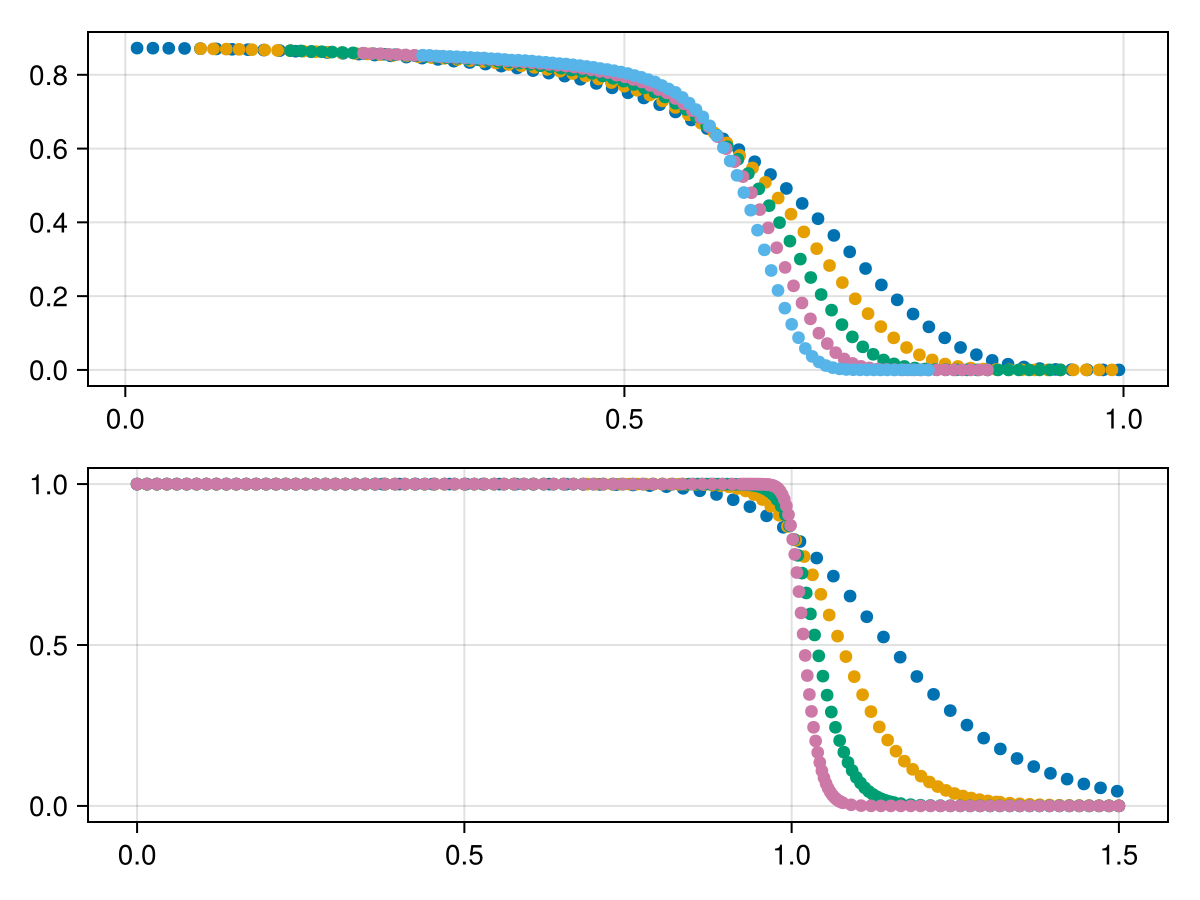

In [3]:
fig = Figure()
ax1 = Axis(fig[1, 1])
ax2 = Axis(fig[2, 1])

for (i, d) in enumerate(ds1)
    scatter!(ax1, xs1[i], ys1[i])
end

for (i, d) in enumerate(ds2)
    scatter!(ax2, xs2[i], ys2[i])
end
fig

### Whats missing? A few obvious things...

- axis labels
- a decent color scheme
- a legend
- a title (usually we want to use the caption in the paper for this instead of a title in the actual figure)


#### About picking colors:
Picking the right colors is not at all trivial and very much depends on the type of data you are plotting. For a plot with different system sizes (like here) I like to use gradients. A few checks when choosing colors might be:
- Are your colors color-blind friendly? (e.g. don't use red and green together)
- Are your colors distinguishable in black and white?
- Is the contrast between the colors (and the background) good enough?
- And of course: Are your colors pleasant to look at?

It also is a good idea to be consistent with your colors throughout your work. Dont use a different color scheme for every plot. An exception to this rule is if you want to distinguish between different types of data. For example, our two data sets {`xs1`, `ys1`, `ds1`} and {`xs2`, `ys2`, `ds2`} are cuts through a phase diagram with different orientations (horizontal and vertical). In this case it might be a good idea to underline this difference by using different colors. However, if you give such a meaning to your colors it makes it all the more important to be consistent throughout your work! 

If you are unsure what colors to use, a good recourse is [Paul Tol’s Color Schemes](https://cran.r-project.org/web/packages/khroma/vignettes/tol.html).  

In [4]:
using ColorSchemes

colorsblue = [ColorSchemes.Blues_6[i] for i in 2:6]
colorsred = [ColorSchemes.Reds_5[i] for i in 2:5];

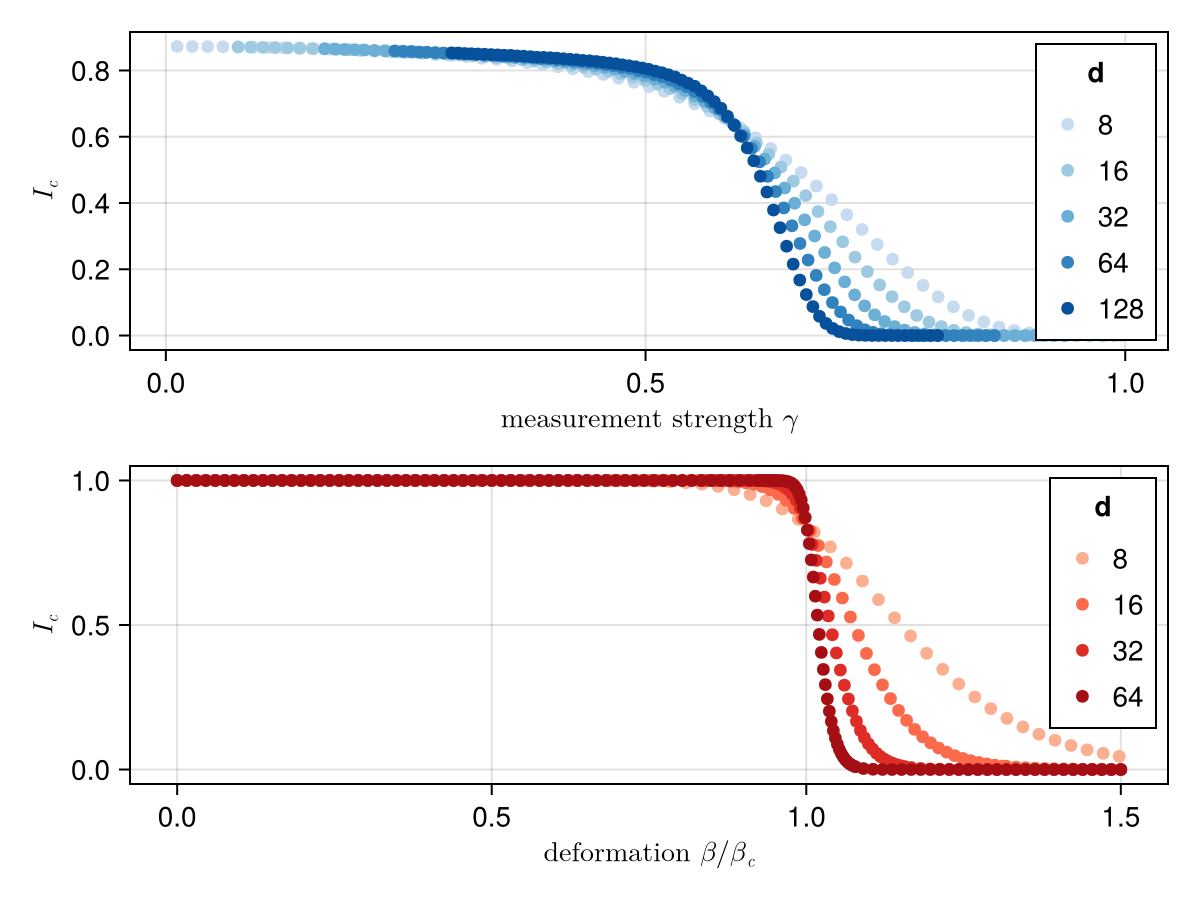

In [5]:
fig = Figure()
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i], label = "$d")
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i], label = "$d")
end
axislegend(ax1, "d")
axislegend(ax2, "d")

fig


### Better already, but the axis look a little streched. Also the legend does not fit. Let's quickly fix that and save the figure.

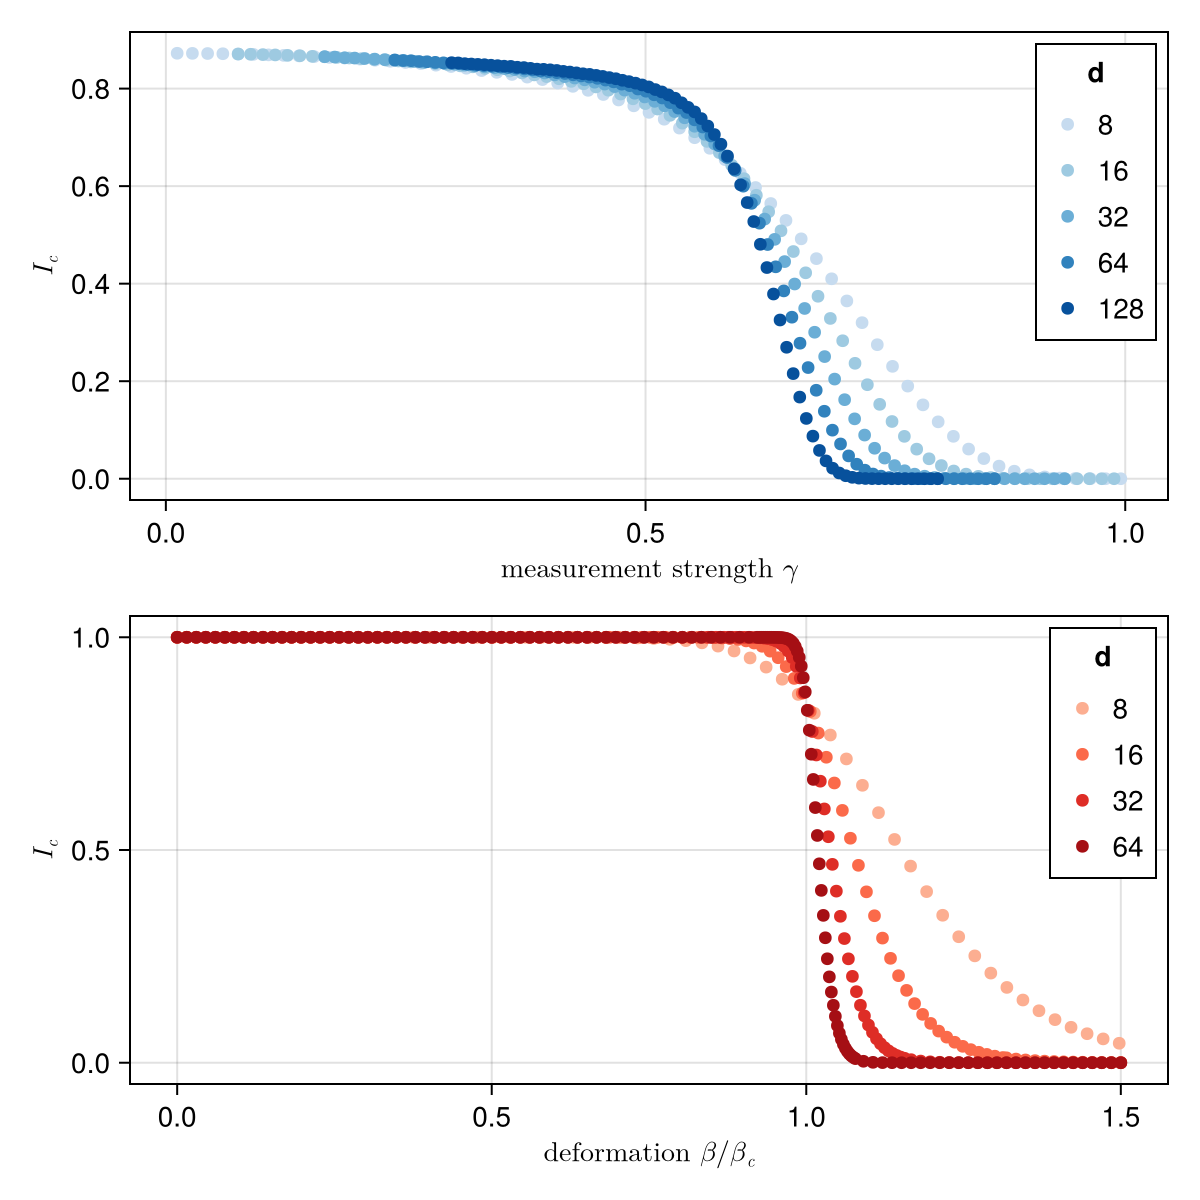

In [6]:
fig = Figure(size = (600, 600))
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i], label = "$d")
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i], label = "$d")
end
axislegend(ax1, "d")
axislegend(ax2, "d")
save("figs/figure1.pdf", fig)
fig


### This looks good ... right? 
Well, not really. When taking a look at the plot inside of the paper, we notice that the font in our figure does not match the font in the paper. There is a quick fix for that -- the `theme_latexfonts()`. 

Also, the legendtitle should not be bold (maybe that's a personal preference, but I think it looks better without the bold font). We can fix that using the `titlefont` keyword argument.

In [7]:
update_theme!(theme_latexfonts())

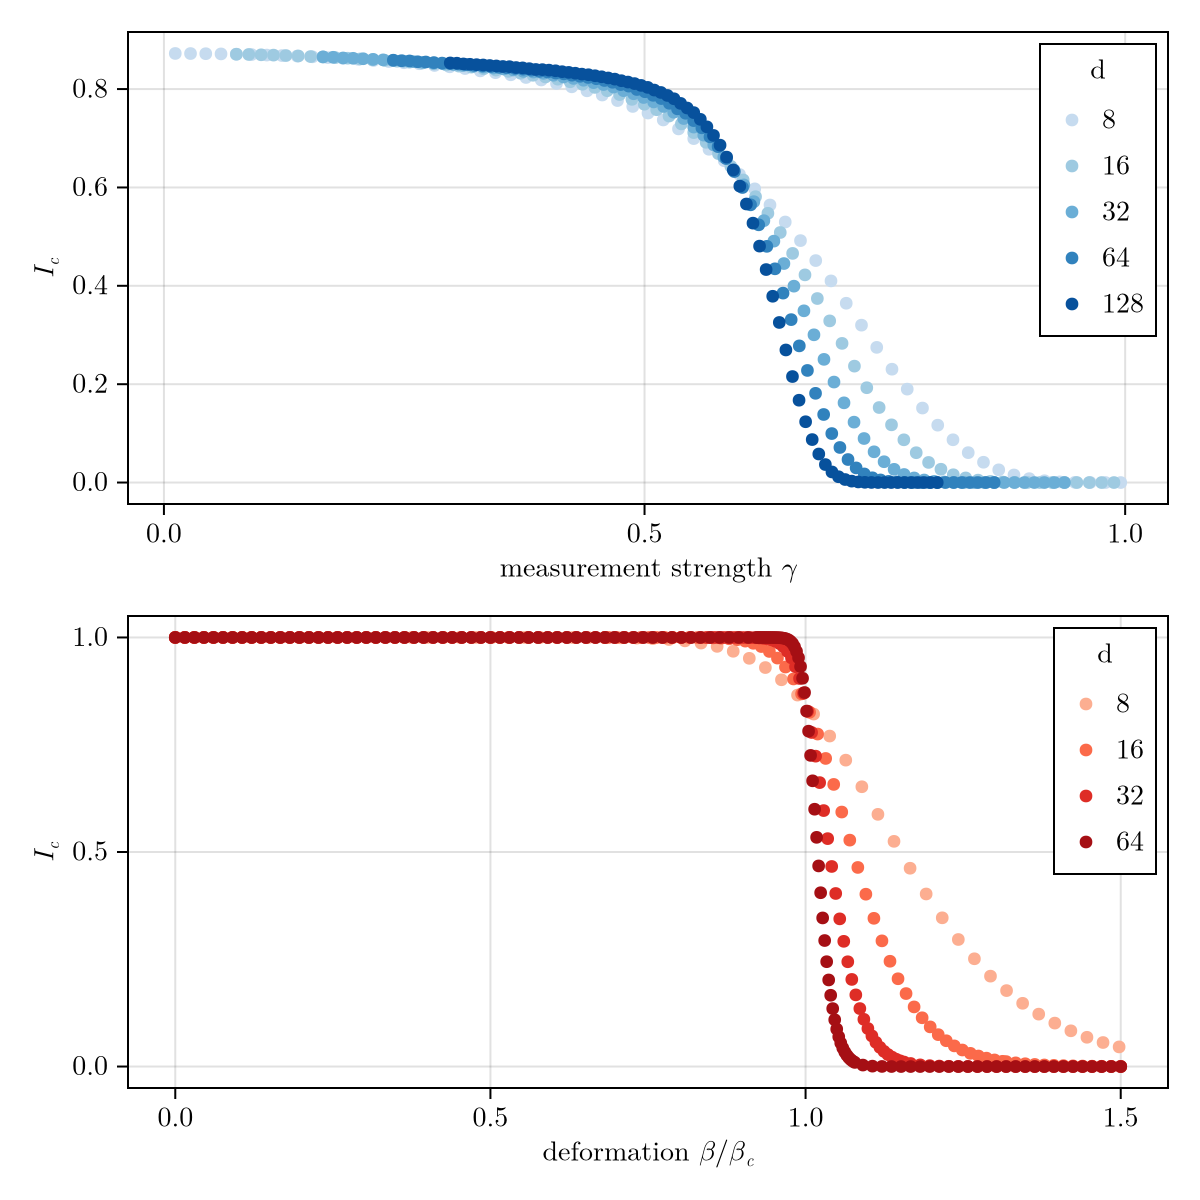

In [8]:
fig = Figure(size = (600, 600))
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i], label = "$d")
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i], label = "$d")
end
axislegend(ax1, "d", titlefont = :regular)
axislegend(ax2, "d", titlefont = :regular)
save("figs/figure2.pdf", fig)
fig


### Great! Now the font matches the font in the paper and we are perfectly happy :) ... well, no. There is still one major thing about the font!

We have to make sure that the font size in the figure matches the font size in the paper (i.e. the latex font sizes `\normalsize`, `\small`, `\footnotesize` and if necessary `\scriptsize`)! 

Which font size to use is a matter of taste, but a decent pick is to make the fontsize of the x and y axis labels (as well as the title in case there is one) the same size as the main text (which usually is `\normalsize`) and everything else, including the ticklabels and the legend of size `\small` or `\footnotesize`. If there are subplots, you may need to make the fontsize of the subplots smaller than the main plot, but you should try not to go smaller than `\scriptsize`, as this get's hard to read.

How can we check whats the actual font size (in points) in the paper? One way of doing this is to use the `\the\fontdimen6\font` command in the latex document. So let's check:

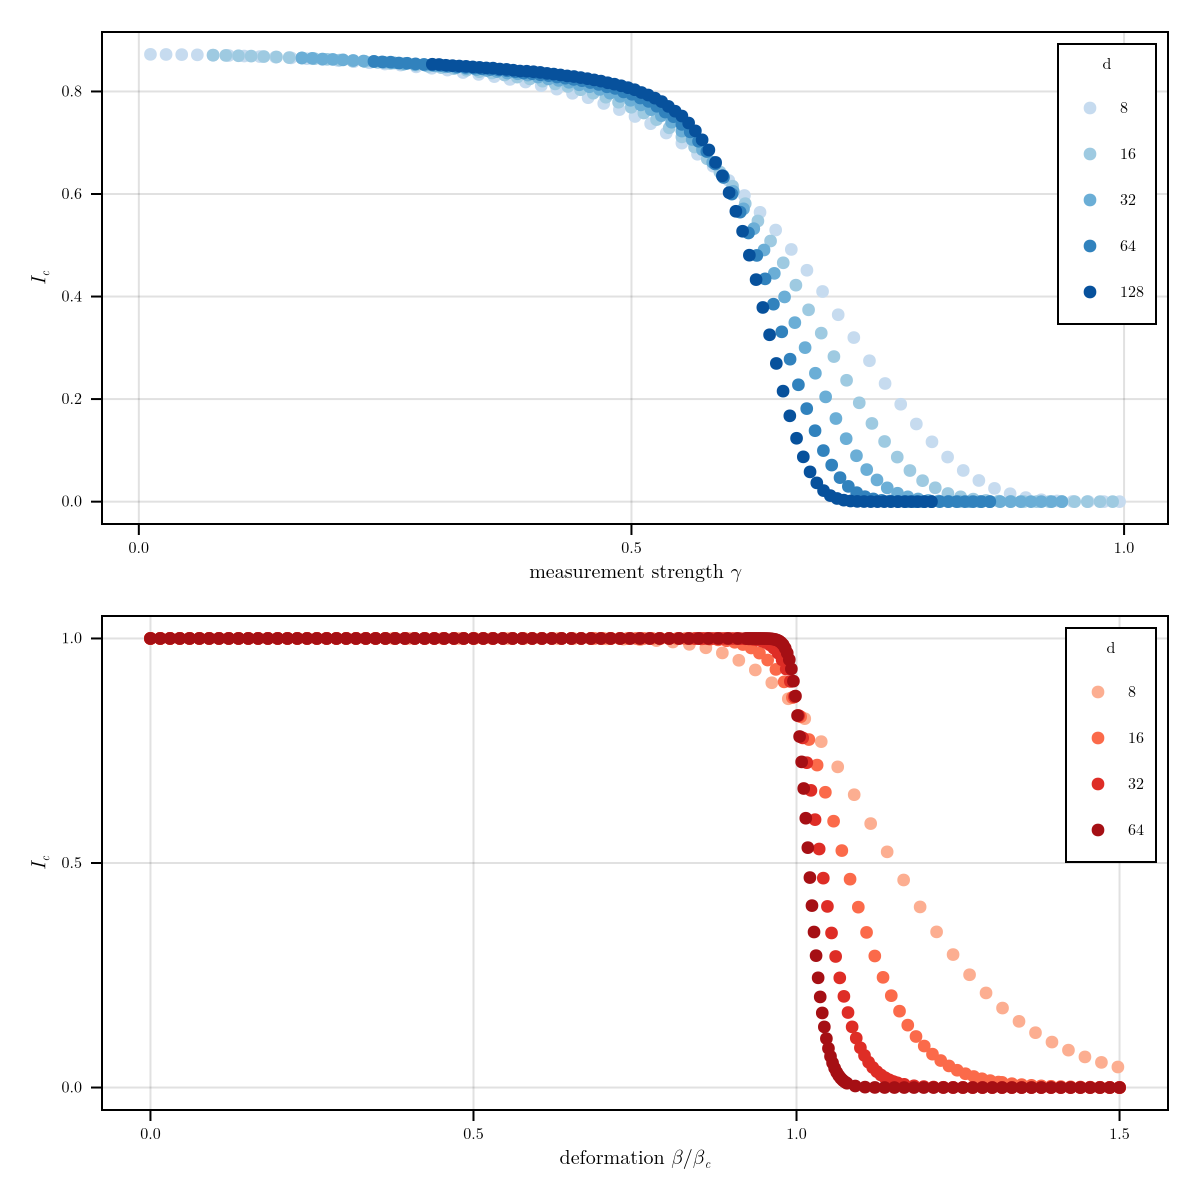

In [9]:
fig = Figure(size = (600, 600), fontsize = 8)
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
	xlabelsize = 10,
	ylabelsize = 10,
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
	xlabelsize = 10,
	ylabelsize = 10,
)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i], label = "$d")
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i], label = "$d")
end
axislegend(ax1, "d", titlefont = :regular)
axislegend(ax2, "d", titlefont = :regular)
fig


### Oooops, this looks bad! What went wrong?

We have to adjust the size of the figure to the actual size it will take in the paper! Usually, you set the width of a figure in your latex document using the `\textwidth` or `\columnwidth` command. We can check what's the size of `\textwidth` or `\columnwidth` in points using the `\the\textwidth` or `\the\columnwidth` command.

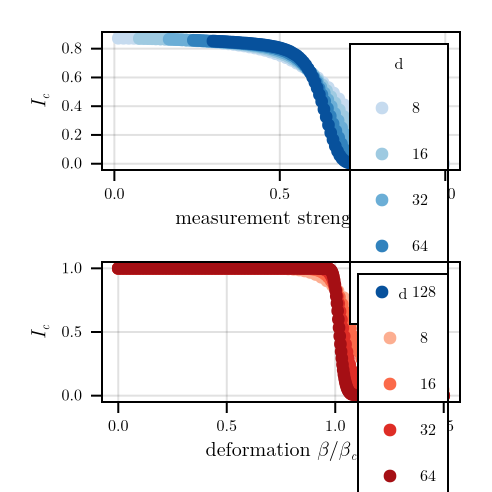

In [10]:
fig = Figure(size = (246, 246), fontsize = 8)
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
	xlabelsize = 10,
	ylabelsize = 10,
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
	xlabelsize = 10,
	ylabelsize = 10,
)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i], label = "$d")
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i], label = "$d")
end
axislegend(ax1, "d", titlefont = :regular)
axislegend(ax2, "d", titlefont = :regular)
save("figs/figure3.pdf", fig)
fig


### Oh no, we ruined it all... 😭

Now that we drastically reduced the size of the figure, we have to adjust a few other things as well. Instead of using many many kwargs, we can define ourself a theme. This is a good idea anyway, as we will probably want to use the same theme for all our figures.

Also, we can use the `CairoMakie.activate!(type="svg", pt_per_unit=1.75)` function to increase the size of the figure in the notebook. This scales the figure, such that we can have a better look :)

In [11]:
# lets define a theme for the figure!
theme = Theme(
    figure_padding=2,
    size=(246, 246),
    fontsize=8,
    Scatter=(
        markersize=4.0,
        strokewidth=0.15,
        marker=:circle,
        strokecolor=(:black, 0.5),
    ),
    Errorbars=(
        linewidth=0.35,
        whiskerwidth=2.0,
        color=:black,
    ),
    Axis=(
        titlefont=:regular,
        titlesize=10,
        xlabelsize=10,
        ylabelsize=10,
        xgridvisible=false,
        ygridvisible=false,
        xticksize=2.5,
        yticksize=2.5,
        xminorticksize=1.5,
        yminorticksize=1.5,
        spinewidth=0.75,
        xtickwidth=0.75,
        ytickwidth=0.75,
    ),
    Legend=(
        labelfont=:regular,
        padding=(2, 2, 2, 2), # The additional space between the legend content and the border.
        patchlabelgap=3, # The gap between the patch and the label of each legend entry.
        patchsize=(4, 4), # The size of the rectangles containing the legend markers.
        rowgap=0, # The gap between the entry rows.
        colgap=0, # The gap between the entry columns.
        titlefont=:regular,
        titlegap=1,
        margin=(2, 2, 2, 2),
        framevisible=false,
    ),
)

# merge the theme with the theme_latexfonts() and update the theme
theme = merge(theme, theme_latexfonts())
update_theme!(theme)

In [12]:
# this scales the size of the rendered figure in the notebook by 1.75
CairoMakie.activate!(type="svg", pt_per_unit=1.75)

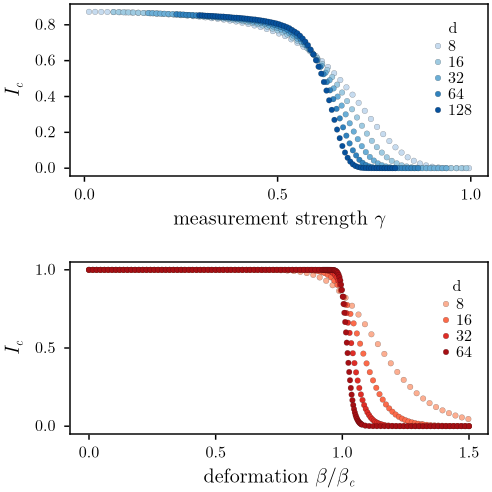

In [13]:
fig = Figure()
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i], label = "$d")
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i], label = "$d")
end
axislegend(ax1, "d")
axislegend(ax2, "d")
save("figs/figure4.pdf", fig)
fig


### We are starting to get somewhere! What else can we improve?
- The legend still has some issues.
    1. The markers are a little bit too small. (I guess this is a matter of taste, but for me they seem too small)
    2. The legendtitle 'd' is not written as an equation.
    3. We should reverse the order of the legend entries, such that the largest system size is on top. (This depends on the structure of the data. If your data is ordered, such that one system size is always on top, you want to follow the same order in the legend. If your data is not ordered, you may want to show the largest system size on top, as this is usually the most important one.)

- We can improve on the y-axis limits. Since we show the same observable in both plots (and the scale is very similar), we might want to use the same y-axis limits (as well as the same y-ticks) to ensure that the reader can easily compare the two plots.

- The distance between the two axis could be a little bit smaller. We can adjust this using the `rowgap!` function.

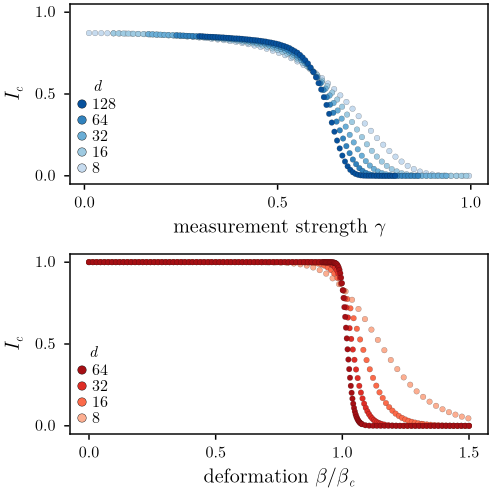

In [14]:
fig = Figure()
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
    limits = (nothing, (-0.05, 1.05)),
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
    limits = (nothing, (-0.05, 1.05)),
)

rowgap!(fig.layout, 10.0)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i])
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i])
end

for (ax, ds, colors) in zip([ax1, ax2], [ds1, ds2], [colorsblue, colorsred])
    axislegend(
        ax,
        reverse([
            MarkerElement(
                color=colors[i], markersize=6,
                marker=:circle,
                strokewidth=0.2
            ) for i in eachindex(ds)
        ]),
        reverse(["$d" for d in ds]),
        L"d",
        position=:lb,
        margin=(2, 2, 2, 2),
    )
end

save("figs/figure5.pdf", fig)
fig


### This is looking good! Very clean :)

### Now this might be a good point to think about what information the figure is supposed to convey.
1.  What is the most important information in the figure?
2. How can we highlight this information? ... make sure it's perceivable at first sight?

#### 1. In our case, the most important information(s) are:
- phase transition(s)
- tricritical point ((roughly) the point where the data crosses in the top plot)
    - we want to emphasize that this point is at finite `\gamma_c > 0`

#### 2. We can highlight this information by:
- Showing either a scaling collapse of the data, or a close-up of the data around the phase transition. If possible, the scaling collapse is preferred, as it holds more information.
- Marking the point of the transition in the plot. This could be done by a vertical dashed line, or by an additional x-tick.
- In order to emphasize the finite value of `\gamma_c` even more, we could shade the area to the left of the tricritical point. This should be done in a decent color however.



### Let's start by adding a subaxis!
This is (unfortunately) somewhat annoying to do in Makie.jl (as far as I know). I usually use a little 'helper' function `get_BBox` which I wrote a while ago. This function calculates a bounding box for the inset plot, given a few input parameters.

In [15]:
function get_BBox(axis; width = 50, height = 50, position = :rt, margin = (3, 3, 3, 3))
	# Get the axis position
	ax_pos = axis.layoutobservables.computedbbox[]

	# Calculate the position based on the specified corner
	if position == :rt  # right top
		x = ax_pos.origin[1] + ax_pos.widths[1] - width - margin[2]
		y = ax_pos.origin[2] + ax_pos.widths[2] - height - margin[1]
	elseif position == :lt  # left top
		x = ax_pos.origin[1] + margin[4]
		y = ax_pos.origin[2] + ax_pos.widths[2] - height - margin[1]
	elseif position == :rb  # right bottom
		x = ax_pos.origin[1] + ax_pos.widths[1] - width - margin[2]
		y = ax_pos.origin[2] + margin[3]
	elseif position == :lb  # left bottom
		x = ax_pos.origin[1] + margin[4]
		y = ax_pos.origin[2] + margin[3]
	end

	return BBox(x, x + width, y, y + height)
end

get_BBox (generic function with 1 method)

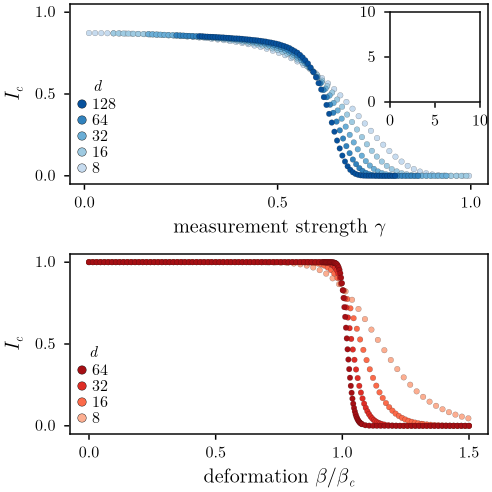

In [ ]:
fig = Figure()
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)

rowgap!(fig.layout, 10.0)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i])
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i])
end

begin
    ### setting up the subaxis
	subbox = get_BBox(
		ax1,
		width = 45,
		height = 45,
		position = :rt,
		margin = (4, 4, 4, 4),
	)

	bg = poly!(fig.scene,
		subbox,
		color = :white,
	)

	# move the background behind all content (excluding gridlines which are at -10)
	translate!(bg, 0, 0, -9)

	axsub = Axis(fig;
		bbox = subbox,
	)
    # move the subaxis gridline before the background!
	translate!(axsub.elements[:xgridlines], 0, 0, -8)
	translate!(axsub.elements[:ygridlines], 0, 0, -8)
end

for (ax, ds, colors) in zip([ax1, ax2], [ds1, ds2], [colorsblue, colorsred])
	axislegend(
		ax,
		reverse([
			MarkerElement(
				color = colors[i], markersize = 6,
				marker = :circle,
				strokewidth = 0.2,
			) for i in eachindex(ds)
		]),
		reverse(["$d" for d in ds]),
		L"d",
		position = :lb,
		margin = (2, 2, 2, 2),
	)
end
fig


### Great, lets fill the subaxis with data!

In [17]:
using ScalingCollapse

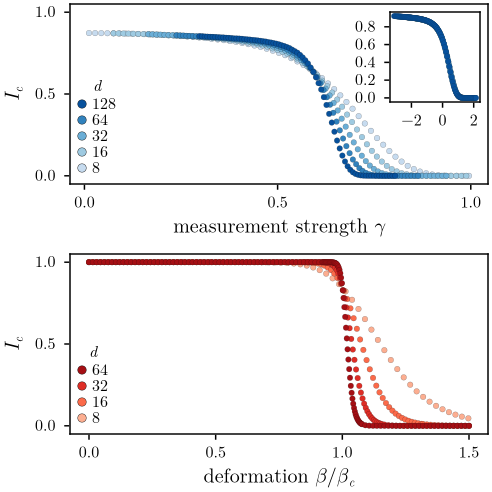

In [ ]:
fig = Figure()
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)

rowgap!(fig.layout, 10.0)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i])
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i])
end

begin
    ### setting up the subaxis
	subbox = get_BBox(
		ax1,
		width = 45,
		height = 45,
		position = :rt,
		margin = (4, 4, 4, 4),
	)

	bg = poly!(fig.scene,
		subbox,
		color = :white,
	)

	# move the background behind all content (excluding gridlines which are at -10)
	translate!(bg, 0, 0, -9)

	axsub = Axis(fig;
		bbox = subbox,
	)
    # move the subaxis gridline before the background!
	translate!(axsub.elements[:xgridlines], 0, 0, -8)
	translate!(axsub.elements[:ygridlines], 0, 0, -8)


    ### doing the scaling collapse and plotting
    begin
        # scaling collapse for the first dataset
        sp1 = ScalingProblem(
            xs1,
            ys1,
            ys1err,
            ds1;
            sf=ScalingFunction(:xy),
            dx=[-2, 2],
            p_space=[0.3:0.1:0.9, 1.0:0.1:5.0, 0.0:0.01:0.1],
            quality=MultipleSplines(),
        )

        # get the scaled data
        sx, sy, se, sL = scaled_data(sp1)
        for (l, L) in enumerate(sL)
            xs = sx[l]
            ys = sy[l]
            yerrs = se[l]
            scatter!(axsub, xs, ys, color=colorsblue[l], strokewidth=0.1)
        end
    end
end

for (ax, ds, colors) in zip([ax1, ax2], [ds1, ds2], [colorsblue, colorsred])
	axislegend(
		ax,
		reverse([
			MarkerElement(
				color = colors[i], markersize = 6,
				marker = :circle,
				strokewidth = 0.2,
			) for i in eachindex(ds)
		]),
		reverse(["$d" for d in ds]),
		L"d",
		position = :lb,
		margin = (2, 2, 2, 2),
	)
end
fig


### Nice! Now let's bring the subaxis to the next level!
- adjust x and y limits
- add x and y labels
- make the y ticks the same as in the main plot (if possible) -- this way we might get away with not showing the y-ticks labels in the inset plot
- mark the region of optimization for the finite size scaling
- do a few small adjustments, like reducing the width of the spines, ticks, fontsizes, etc., as well as moving the tick markers inside the plot.


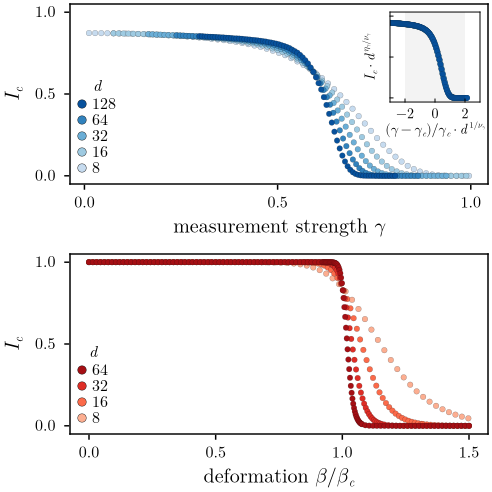

In [ ]:
fig = Figure()
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)

rowgap!(fig.layout, 10.0)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i])
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i])
end

begin
	subbox = get_BBox(
		ax1,
		width = 45,
		height = 45,
		position = :rt,
		margin = (4, 4, 4, 4),
	)

	bg = poly!(fig.scene,
		subbox,
		color = :white,
	)

	# move the background behind all content (excluding gridlines which are at -10)
	translate!(bg, 0, 0, -9)

	axsub = Axis(fig;
		bbox = subbox,
		ylabelvisible = true,
		yticklabelsvisible = false,
		xlabel = L"(\gamma-\gamma_c) / \gamma_c \cdot d^{\: 1/ \nu_\gamma}",  # \frac{t-t_c}{t_c} \cdot d^{1/ \nu}
		ylabel = L"I_c \cdot d^{\: \eta_\gamma / \nu_\gamma}",
		yticks = ([0, 1, 1 / 2], [L"0.0", L"1.0", L"0.5"]),
		xticks = LinearTicks(3),
		xlabelsize = 7,
		ylabelsize = 7,
		xticklabelsize = 7,
		yticklabelsize = 7,
		xlabelpadding = 0.0,
		xtickalign = 1,
		ytickalign = 1,
		yticklabelpad = 2,
		limits = ((-3, 3), (-1 / 20, 1 * 21 / 20)),
		spinewidth = 0.5,
		xticksize = 2,
		yticksize = 2,
		xtickwidth = 0.5,
		ytickwidth = 0.5,
	)
	# move the subaxis gridline before the background!
	translate!(axsub.elements[:xgridlines], 0, 0, -8)
	translate!(axsub.elements[:ygridlines], 0, 0, -8)


	### doing the scaling collapse and plotting
	begin
		# scaling collapse for the first dataset
		sp1 = ScalingProblem(
			xs1,
			ys1,
			ys1err,
			ds1;
			sf = ScalingFunction(:xy),
			dx = [-2, 2],
			p_space = [0.3:0.1:0.9, 1.0:0.1:5.0, 0.0:0.01:0.1],
			quality = MultipleSplines(),
		)

		# get the scaled data
		sx, sy, se, sL = scaled_data(sp1)
		for (l, L) in enumerate(sL)
			xs = sx[l]
			ys = sy[l]
			yerrs = se[l]
			scatter!(axsub, xs, ys, color = colorsblue[l], strokewidth = 0.1)
		end
        vs_1 = vspan!(axsub, [sp1.dx[1]], [sp1.dx[2]], color=(:black, 0.05))
        translate!(vs_1, 0, 0, -8)
	end

end

for (ax, ds, colors) in zip([ax1, ax2], [ds1, ds2], [colorsblue, colorsred])
	axislegend(
		ax,
		reverse([
			MarkerElement(
				color = colors[i], markersize = 6,
				marker = :circle,
				strokewidth = 0.2,
			) for i in eachindex(ds)
		]),
		reverse(["$d" for d in ds]),
		L"d",
		position = :lb,
		margin = (2, 2, 2, 2),
	)
end
fig


### Nice! Now let's repeat the same for the other plot!

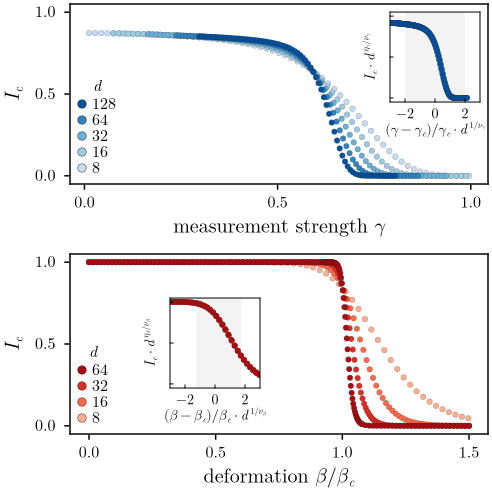

In [20]:
fig = Figure()
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)

rowgap!(fig.layout, 10.0)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i])
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i])
end

# subplot top axis
begin
	subbox = get_BBox(
		ax1,
		width = 45,
		height = 45,
		position = :rt,
		margin = (4, 4, 4, 4),
	)

	bg = poly!(fig.scene,
		subbox,
		color = :white,
	)

	# move the background behind all content (excluding gridlines which are at -10)
	translate!(bg, 0, 0, -9)

	axsub = Axis(fig;
		bbox = subbox,
		ylabelvisible = true,
		yticklabelsvisible = false,
		xlabel = L"(\gamma-\gamma_c) / \gamma_c \cdot d^{\: 1/ \nu_\gamma}",  # \frac{t-t_c}{t_c} \cdot d^{1/ \nu}
		ylabel = L"I_c \cdot d^{\: \eta_\gamma / \nu_\gamma}",
		yticks = ([0, 1, 1 / 2], [L"0.0", L"1.0", L"0.5"]),
		xticks = LinearTicks(3),
		xlabelsize = 7,
		ylabelsize = 7,
		xticklabelsize = 7,
		yticklabelsize = 7,
		xlabelpadding = 0.0,
		xtickalign = 1,
		ytickalign = 1,
		yticklabelpad = 2,
		limits = ((-3, 3), (-1 / 20, 1 * 21 / 20)),
		spinewidth = 0.5,
		xticksize = 2,
		yticksize = 2,
		xtickwidth = 0.5,
		ytickwidth = 0.5,
	)
	# move the subaxis gridline before the background!
	translate!(axsub.elements[:xgridlines], 0, 0, -8)
	translate!(axsub.elements[:ygridlines], 0, 0, -8)


	### doing the scaling collapse and plotting
	begin
		# scaling collapse for the first dataset
		sp1 = ScalingProblem(
			xs1,
			ys1,
			ys1err,
			ds1;
			sf = ScalingFunction(:xy),
			dx = [-2, 2],
			p_space = [0.3:0.1:0.9, 1.0:0.1:5.0, 0.0:0.01:0.1],
			quality = MultipleSplines(),
		)

		# get the scaled data
		sx, sy, se, sL = scaled_data(sp1)
		for (l, L) in enumerate(sL)
			xs = sx[l]
			ys = sy[l]
			yerrs = se[l]
			scatter!(axsub, xs, ys, color = colorsblue[l], strokewidth = 0.1)
		end
		vs_1 = vspan!(axsub, [sp1.dx[1]], [sp1.dx[2]], color = (:black, 0.05))
		translate!(vs_1, 0, 0, -8)
	end

end

# subplot bottom axis
begin
	subbox = get_BBox(
		ax2,
		width = 45,
		height = 45,
		position = :lb,
		margin = (20, 20, 23, 50.2),
	)

	bg = poly!(fig.scene,
		subbox,
		color = :white,
	)
	translate!(bg, 0, 0, -9) # bg behind patches but before content at 0 (legend is at +10)
	
    axsub = Axis(fig;
		bbox = subbox,
		ylabelvisible = true,
		yticklabelsvisible = false,
		xlabel = L"(\beta-\beta_c) / \beta_c \cdot d^{\: 1/ \nu_\beta}",
		ylabel = L"I_c \cdot d^{\: \eta_\beta / \nu_\beta}",
		yticks = ([0, 1, 1 / 2], [L"0", L"1", L"\frac{1}{2}"]),
		xticks = LinearTicks(3),
		xlabelsize = 7,
		ylabelsize = 7,
		xticklabelsize = 7,
		yticklabelsize = 7,
		xlabelpadding = 0.0,
		xtickalign = 1,
		ytickalign = 1,
		yticklabelpad = 2,
		limits = ((-3, 3), (-1 / 20, 1 * 21 / 20)),
		spinewidth = 0.5,
		xticksize = 2,
		yticksize = 2,
		xtickwidth = 0.5,
		ytickwidth = 0.5,
	)
	translate!(axsub.elements[:xgridlines], 0, 0, -8)
	translate!(axsub.elements[:ygridlines], 0, 0, -8)

	begin
		sp2 = ScalingProblem(
			xs2,
			ys2,
            ys2err,
            ds2;
			sf = ScalingFunction(:xy),
			p_space = [0.6:0.01:1.3, 0.5:0.1:1.5, -0.5:0.1:0.5],
			dx = [-1.25, 1.75],
			quality = MultipleSplines(N_steps = 100),
		)
		sx, sy, se, sL = scaled_data(sp2)

		for (l, L) in enumerate(sL)
			xs = sx[l]
			ys = sy[l]
			yerrs = se[l]
			scatter!(axsub, xs, ys, color = colorsred[l], strokewidth = 0.1)
		end
		vs_2 = vspan!(axsub, [sp2.dx[1]], [sp2.dx[2]], color = (:black, 0.05))
		translate!(vs_2, 0, 0, -8)
	end
end

for (ax, ds, colors) in zip([ax1, ax2], [ds1, ds2], [colorsblue, colorsred])
	axislegend(
		ax,
		reverse([
			MarkerElement(
				color = colors[i], markersize = 6,
				marker = :circle,
				strokewidth = 0.2,
			) for i in eachindex(ds)
		]),
		reverse(["$d" for d in ds]),
		L"d",
		position = :lb,
		margin = (2, 2, 2, 2),
	)
end
save("figs/figure6.pdf", fig)
fig


### Looking good! What are we missing?

Now that we show a scaling collapse, we should also show the parameters! You can to this using the `text!` function. However, I prefer to add the parameters by 'abusing' the `axislegend` function. This way they are always evenly spaces and look nice :)

In [21]:
sp1

ScalingProblem
    Scaling function:
        x -> (x - p1)/p1 * L^(1/p2)
        y -> y * L^(p3/p2)
    Optimal parameters:
        p1 = 0.5980465451677133 ± 0.0020456949924619735
        p2 = 2.6581251587998618 ± 0.05404956842410173
        p3 = 0.041657264644830376 ± 0.003291440393339273
    Optimization interval dx:
        -2.0 < x < 2.0
    Searched parameter space:
        p1 ∈ 0.3:0.1:0.9
        p2 ∈ 1.0:0.1:5.0
        p3 ∈ 0.0:0.01:0.1


In [22]:
sp2

ScalingProblem
    Scaling function:
        x -> (x - p1)/p1 * L^(1/p2)
        y -> y * L^(p3/p2)
    Optimal parameters:
        p1 = 1.000574996215732 ± 0.0001607667523936545
        p2 = 0.9981032082132892 ± 0.00482062434959642
        p3 = 0.001037065384062091 ± 0.000619171429436485
    Optimization interval dx:
        -1.25 < x < 1.75
    Searched parameter space:
        p1 ∈ 0.6:0.01:1.3
        p2 ∈ 0.5:0.1:1.5
        p3 ∈ -0.5:0.1:0.5


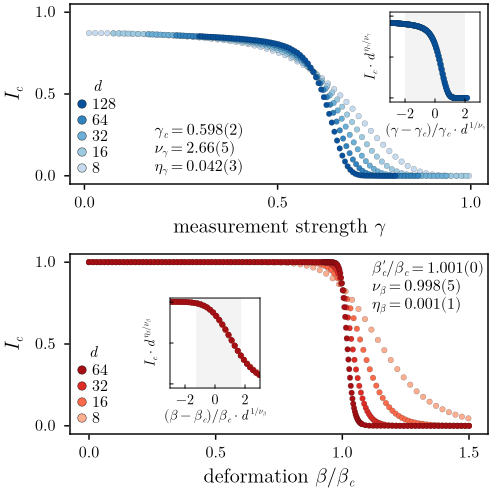

In [23]:
fig = Figure()
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)

rowgap!(fig.layout, 10.0)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i])
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i])
end

# subplot top axis
begin
	subbox = get_BBox(
		ax1,
		width = 45,
		height = 45,
		position = :rt,
		margin = (4, 4, 4, 4),
	)

	bg = poly!(fig.scene,
		subbox,
		color = :white,
	)

	# move the background behind all content (excluding gridlines which are at -10)
	translate!(bg, 0, 0, -9)

	axsub = Axis(fig;
		bbox = subbox,
		ylabelvisible = true,
		yticklabelsvisible = false,
		xlabel = L"(\gamma-\gamma_c) / \gamma_c \cdot d^{\: 1/ \nu_\gamma}",  # \frac{t-t_c}{t_c} \cdot d^{1/ \nu}
		ylabel = L"I_c \cdot d^{\: \eta_\gamma / \nu_\gamma}",
		yticks = ([0, 1, 1 / 2], [L"0.0", L"1.0", L"0.5"]),
		xticks = LinearTicks(3),
		xlabelsize = 7,
		ylabelsize = 7,
		xticklabelsize = 7,
		yticklabelsize = 7,
		xlabelpadding = 0.0,
		xtickalign = 1,
		ytickalign = 1,
		yticklabelpad = 2,
		limits = ((-3, 3), (-1 / 20, 1 * 21 / 20)),
		spinewidth = 0.5,
		xticksize = 2,
		yticksize = 2,
		xtickwidth = 0.5,
		ytickwidth = 0.5,
	)
	# move the subaxis gridline before the background!
	translate!(axsub.elements[:xgridlines], 0, 0, -8)
	translate!(axsub.elements[:ygridlines], 0, 0, -8)


	### doing the scaling collapse and plotting
	begin
		# scaling collapse for the first dataset
		sp1 = ScalingProblem(
			xs1,
			ys1,
			ys1err,
			ds1;
			sf = ScalingFunction(:xy),
			dx = [-2, 2],
			p_space = [0.3:0.1:0.9, 1.0:0.1:5.0, 0.0:0.01:0.1],
			quality = MultipleSplines(),
		)

		# get the scaled data
		sx, sy, se, sL = scaled_data(sp1)
		for (l, L) in enumerate(sL)
			xs = sx[l]
			ys = sy[l]
			yerrs = se[l]
			scatter!(axsub, xs, ys, color = colorsblue[l], strokewidth = 0.1)
		end
		vs_1 = vspan!(axsub, [sp1.dx[1]], [sp1.dx[2]], color = (:black, 0.05))
		translate!(vs_1, 0, 0, -8)
	end

end

# subplot bottom axis
begin
	subbox = get_BBox(
		ax2,
		width = 45,
		height = 45,
		position = :lb,
		margin = (20, 20, 23, 50.2),
	)

	bg = poly!(fig.scene,
		subbox,
		color = :white,
	)
	translate!(bg, 0, 0, -9) # bg behind patches but before content at 0 (legend is at +10)
	
    axsub = Axis(fig;
		bbox = subbox,
		ylabelvisible = true,
		yticklabelsvisible = false,
		xlabel = L"(\beta-\beta_c) / \beta_c \cdot d^{\: 1/ \nu_\beta}",
		ylabel = L"I_c \cdot d^{\: \eta_\beta / \nu_\beta}",
		yticks = ([0, 1, 1 / 2], [L"0", L"1", L"\frac{1}{2}"]),
		xticks = LinearTicks(3),
		xlabelsize = 7,
		ylabelsize = 7,
		xticklabelsize = 7,
		yticklabelsize = 7,
		xlabelpadding = 0.0,
		xtickalign = 1,
		ytickalign = 1,
		yticklabelpad = 2,
		limits = ((-3, 3), (-1 / 20, 1 * 21 / 20)),
		spinewidth = 0.5,
		xticksize = 2,
		yticksize = 2,
		xtickwidth = 0.5,
		ytickwidth = 0.5,
	)
	translate!(axsub.elements[:xgridlines], 0, 0, -8)
	translate!(axsub.elements[:ygridlines], 0, 0, -8)

	begin
		sp2 = ScalingProblem(
			xs2,
			ys2,
            ys2err,
            ds2;
			sf = ScalingFunction(:xy),
			p_space = [0.6:0.01:1.3, 0.5:0.1:1.5, -0.5:0.1:0.5],
			dx = [-1.25, 1.75],
			quality = MultipleSplines(N_steps = 100),
		)
		sx, sy, se, sL = scaled_data(sp2)

		for (l, L) in enumerate(sL)
			xs = sx[l]
			ys = sy[l]
			yerrs = se[l]
			scatter!(axsub, xs, ys, color = colorsred[l], strokewidth = 0.1)
		end
		vs_2 = vspan!(axsub, [sp2.dx[1]], [sp2.dx[2]], color = (:black, 0.05))
		translate!(vs_2, 0, 0, -8)
	end
end

for (ax, ds, colors) in zip([ax1, ax2], [ds1, ds2], [colorsblue, colorsred])
	axislegend(
		ax,
		reverse([
			MarkerElement(
				color = colors[i], markersize = 6,
				marker = :circle,
				strokewidth = 0.2,
			) for i in eachindex(ds)
		]),
		reverse(["$d" for d in ds]),
		L"d",
		position = :lb,
		margin = (2, 2, 2, 2),
	)
end


axislegend(
    ax1,
    [MarkerElement(color=(:white, 0.0), markersize=0.0, marker=:circle) for _ in 1:3],
    [
        L"\gamma_c = 0.598(2)",
        L"\nu_\gamma= 2.66(5)",
        L"\eta_\gamma= 0.042(3)",
    ];
    position=:lb,
    margin=(33, 2, 2, 20),
)

axislegend(
    ax2,
    [MarkerElement(color=(:white, 0.0), markersize=0.0, marker=:circle) for _ in 1:3],
    [
        L"\beta_c' / \beta_c= 1.001(0)",
        L"\nu_\beta= 0.998(5)",
        L"\eta_\beta= 0.001(1)",
        ];
    position=:rt,
    margin=(0, 0, 0, 0),
)
save("figs/figure7.pdf", fig)
fig


### Can we still improve the figure?
I would like to align the equal signs of the parameters. Let't do that! For this we again need to use a little trick and use multiple legends instead of one.

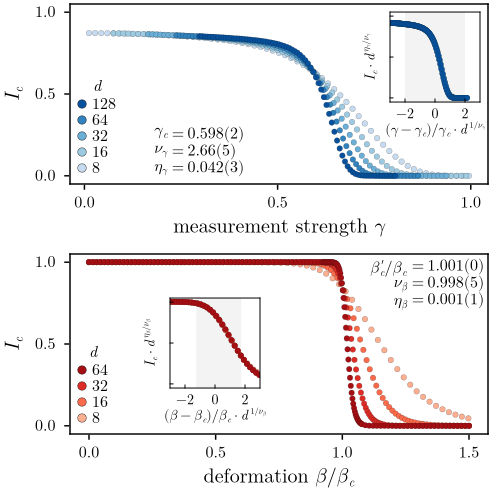

In [24]:
fig = Figure()
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)

rowgap!(fig.layout, 10.0)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i])
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i])
end

# subplot top axis
begin
	subbox = get_BBox(
		ax1,
		width = 45,
		height = 45,
		position = :rt,
		margin = (4, 4, 4, 4),
	)

	bg = poly!(fig.scene,
		subbox,
		color = :white,
	)

	# move the background behind all content (excluding gridlines which are at -10)
	translate!(bg, 0, 0, -9)

	axsub = Axis(fig;
		bbox = subbox,
		ylabelvisible = true,
		yticklabelsvisible = false,
		xlabel = L"(\gamma-\gamma_c) / \gamma_c \cdot d^{\: 1/ \nu_\gamma}",  # \frac{t-t_c}{t_c} \cdot d^{1/ \nu}
		ylabel = L"I_c \cdot d^{\: \eta_\gamma / \nu_\gamma}",
		yticks = ([0, 1, 1 / 2], [L"0.0", L"1.0", L"0.5"]),
		xticks = LinearTicks(3),
		xlabelsize = 7,
		ylabelsize = 7,
		xticklabelsize = 7,
		yticklabelsize = 7,
		xlabelpadding = 0.0,
		xtickalign = 1,
		ytickalign = 1,
		yticklabelpad = 2,
		limits = ((-3, 3), (-1 / 20, 1 * 21 / 20)),
		spinewidth = 0.5,
		xticksize = 2,
		yticksize = 2,
		xtickwidth = 0.5,
		ytickwidth = 0.5,
	)
	# move the subaxis gridline before the background!
	translate!(axsub.elements[:xgridlines], 0, 0, -8)
	translate!(axsub.elements[:ygridlines], 0, 0, -8)


	### doing the scaling collapse and plotting
	begin
		# scaling collapse for the first dataset
		sp1 = ScalingProblem(
			xs1,
			ys1,
			ys1err,
			ds1;
			sf = ScalingFunction(:xy),
			dx = [-2, 2],
			p_space = [0.3:0.1:0.9, 1.0:0.1:5.0, 0.0:0.01:0.1],
			quality = MultipleSplines(),
		)

		# get the scaled data
		sx, sy, se, sL = scaled_data(sp1)
		for (l, L) in enumerate(sL)
			xs = sx[l]
			ys = sy[l]
			yerrs = se[l]
			scatter!(axsub, xs, ys, color = colorsblue[l], strokewidth = 0.1)
		end
		vs_1 = vspan!(axsub, [sp1.dx[1]], [sp1.dx[2]], color = (:black, 0.05))
		translate!(vs_1, 0, 0, -8)
	end

end

# subplot bottom axis
begin
	subbox = get_BBox(
		ax2,
		width = 45,
		height = 45,
		position = :lb,
		margin = (20, 20, 23, 50.2),
	)

	bg = poly!(fig.scene,
		subbox,
		color = :white,
	)
	translate!(bg, 0, 0, -9) # bg behind patches but before content at 0 (legend is at +10)
	
    axsub = Axis(fig;
		bbox = subbox,
		ylabelvisible = true,
		yticklabelsvisible = false,
		xlabel = L"(\beta-\beta_c) / \beta_c \cdot d^{\: 1/ \nu_\beta}",
		ylabel = L"I_c \cdot d^{\: \eta_\beta / \nu_\beta}",
		yticks = ([0, 1, 1 / 2], [L"0", L"1", L"\frac{1}{2}"]),
		xticks = LinearTicks(3),
		xlabelsize = 7,
		ylabelsize = 7,
		xticklabelsize = 7,
		yticklabelsize = 7,
		xlabelpadding = 0.0,
		xtickalign = 1,
		ytickalign = 1,
		yticklabelpad = 2,
		limits = ((-3, 3), (-1 / 20, 1 * 21 / 20)),
		spinewidth = 0.5,
		xticksize = 2,
		yticksize = 2,
		xtickwidth = 0.5,
		ytickwidth = 0.5,
	)
	translate!(axsub.elements[:xgridlines], 0, 0, -8)
	translate!(axsub.elements[:ygridlines], 0, 0, -8)

	begin
		sp2 = ScalingProblem(
			xs2,
			ys2,
            ys2err,
            ds2;
			sf = ScalingFunction(:xy),
			p_space = [0.6:0.01:1.3, 0.5:0.1:1.5, -0.5:0.1:0.5],
			dx = [-1.25, 1.75],
			quality = MultipleSplines(N_steps = 100),
		)
		sx, sy, se, sL = scaled_data(sp2)

		for (l, L) in enumerate(sL)
			xs = sx[l]
			ys = sy[l]
			yerrs = se[l]
			scatter!(axsub, xs, ys, color = colorsred[l], strokewidth = 0.1)
		end
		vs_2 = vspan!(axsub, [sp2.dx[1]], [sp2.dx[2]], color = (:black, 0.05))
		translate!(vs_2, 0, 0, -8)
	end
end

for (ax, ds, colors) in zip([ax1, ax2], [ds1, ds2], [colorsblue, colorsred])
	axislegend(
		ax,
		reverse([
			MarkerElement(
				color = colors[i], markersize = 6,
				marker = :circle,
				strokewidth = 0.2,
			) for i in eachindex(ds)
		]),
		reverse(["$d" for d in ds]),
		L"d",
		position = :lb,
		margin = (2, 2, 2, 2),
	)
end


axislegend(
    ax1,
    [MarkerElement(color=(:white, 0.0), markersize=0.0, marker=:circle) for _ in 1:3],
    [
        L"\gamma_c",
        L"\nu_\gamma ",
        L"\eta_\gamma ",
    ];
    position=:lb,
    margin=(33, 2, 2, 20),
)
axislegend(
    ax1,
    [MarkerElement(color=(:white, 0.0), markersize=0.0, marker=:circle) for _ in 1:3],
    [
        L"= 0.598(2)",
        L"= 2.66(5)",
        L"= 0.042(3)",
    ];
    position=:lb,
    margin=(42, 2, 2, 20),
)
axislegend(
    ax2,
    [MarkerElement(color=(:white, 0.0), markersize=0.0, marker=:circle) for _ in 1:3],
    [
        L"\beta_c' / \beta_c", 
        " ",
        " ",
        ];
    position=:rt,
    margin=(0, 38.5, 0, 0),
)
axislegend(
    ax2,
    [MarkerElement(color=(:white, 0.0), markersize=0.0, marker=:circle) for _ in 1:3],
    [
        " ", 
        L"\nu_\beta",
        L"\eta_\beta",
        ];
    position=:rt,
    margin=(0, 38.5, 0, 0),
)
axislegend(
    ax2,
    [MarkerElement(color=(:white, 0.0), markersize=0.0, marker=:circle) for _ in 1:3],
    [
        L"= 1.001(0)", 
        L"= 0.998(5)",
        L"= 0.001(1)",
        ];
    position=:rt,
    margin=(0, 0, 0, 0),
)

save("figs/figure8.pdf", fig)
fig


### Beautiful! Now let's do some minor cosmetic adjustments to emphasize the critical points and transitions a little bit more.

- add vertical dashed lines to mark the transitions
- shade the area to the left of the tricritical point
- add labels to the two interestin critical points in the upper plot, I for Ising and T for tricritical point (this is to follow the story and notation of the paper)

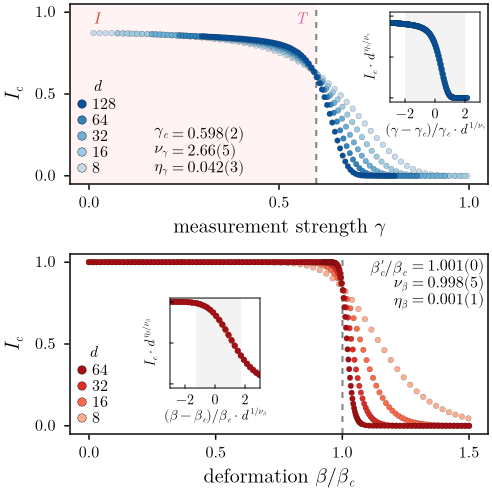

In [25]:
fig = Figure()
ax1 = Axis(fig[1, 1],
	xlabel = L"\text{measurement strength } \gamma",
	ylabel = L"I_c",
	limits = ((-0.05, 1.05), (-0.05, 1.05)),
)
ax2 = Axis(fig[2, 1],
	xlabel = L"\text{deformation } \beta/\beta_c",
	ylabel = L"I_c",
	limits = (nothing, (-0.05, 1.05)),
)

rowgap!(fig.layout, 10.0)

for (i, d) in enumerate(ds1)
	scatter!(ax1, xs1[i], ys1[i], color = colorsblue[i])
end

for (i, d) in enumerate(ds2)
	scatter!(ax2, xs2[i], ys2[i], color = colorsred[i])
end

# subplot top axis
begin
	subbox = get_BBox(
		ax1,
		width = 45,
		height = 45,
		position = :rt,
		margin = (4, 4, 4, 4),
	)

	bg = poly!(fig.scene,
		subbox,
		color = :white,
	)

	# move the background behind all content (excluding gridlines which are at -10)
	translate!(bg, 0, 0, -9)

	axsub = Axis(fig;
		bbox = subbox,
		ylabelvisible = true,
		yticklabelsvisible = false,
		xlabel = L"(\gamma-\gamma_c) / \gamma_c \cdot d^{\: 1/ \nu_\gamma}",  # \frac{t-t_c}{t_c} \cdot d^{1/ \nu}
		ylabel = L"I_c \cdot d^{\: \eta_\gamma / \nu_\gamma}",
		yticks = ([0, 1, 1 / 2], [L"0.0", L"1.0", L"0.5"]),
		xticks = LinearTicks(3),
		xlabelsize = 7,
		ylabelsize = 7,
		xticklabelsize = 7,
		yticklabelsize = 7,
		xlabelpadding = 0.0,
		xtickalign = 1,
		ytickalign = 1,
		yticklabelpad = 2,
		limits = ((-3, 3), (-1 / 20, 1 * 21 / 20)),
		spinewidth = 0.5,
		xticksize = 2,
		yticksize = 2,
		xtickwidth = 0.5,
		ytickwidth = 0.5,
	)
	# move the subaxis gridline before the background!
	translate!(axsub.elements[:xgridlines], 0, 0, -8)
	translate!(axsub.elements[:ygridlines], 0, 0, -8)


	### doing the scaling collapse and plotting
	begin
		# scaling collapse for the first dataset
		sp1 = ScalingProblem(
			xs1,
			ys1,
			ys1err,
			ds1;
			sf = ScalingFunction(:xy),
			dx = [-2, 2],
			p_space = [0.3:0.1:0.9, 1.0:0.1:5.0, 0.0:0.01:0.1],
			quality = MultipleSplines(),
		)

		# get the scaled data
		sx, sy, se, sL = scaled_data(sp1)
		for (l, L) in enumerate(sL)
			xs = sx[l]
			ys = sy[l]
			yerrs = se[l]
			scatter!(axsub, xs, ys, color = colorsblue[l], strokewidth = 0.1)
		end
		vs_1 = vspan!(axsub, [sp1.dx[1]], [sp1.dx[2]], color = (:black, 0.05))
		translate!(vs_1, 0, 0, -8)
	end

end

# subplot bottom axis
begin
	subbox = get_BBox(
		ax2,
		width = 45,
		height = 45,
		position = :lb,
		margin = (20, 20, 23, 50.2),
	)

	bg = poly!(fig.scene,
		subbox,
		color = :white,
	)
	translate!(bg, 0, 0, -9) # bg behind patches but before content at 0 (legend is at +10)
	
    axsub = Axis(fig;
		bbox = subbox,
		ylabelvisible = true,
		yticklabelsvisible = false,
		xlabel = L"(\beta-\beta_c) / \beta_c \cdot d^{\: 1/ \nu_\beta}",
		ylabel = L"I_c \cdot d^{\: \eta_\beta / \nu_\beta}",
		yticks = ([0, 1, 1 / 2], [L"0", L"1", L"\frac{1}{2}"]),
		xticks = LinearTicks(3),
		xlabelsize = 7,
		ylabelsize = 7,
		xticklabelsize = 7,
		yticklabelsize = 7,
		xlabelpadding = 0.0,
		xtickalign = 1,
		ytickalign = 1,
		yticklabelpad = 2,
		limits = ((-3, 3), (-1 / 20, 1 * 21 / 20)),
		spinewidth = 0.5,
		xticksize = 2,
		yticksize = 2,
		xtickwidth = 0.5,
		ytickwidth = 0.5,
	)
	translate!(axsub.elements[:xgridlines], 0, 0, -8)
	translate!(axsub.elements[:ygridlines], 0, 0, -8)

	begin
		sp2 = ScalingProblem(
			xs2,
			ys2,
            ys2err,
            ds2;
			sf = ScalingFunction(:xy),
			p_space = [0.6:0.01:1.3, 0.5:0.1:1.5, -0.5:0.1:0.5],
			dx = [-1.25, 1.75],
			quality = MultipleSplines(N_steps = 100),
		)
		sx, sy, se, sL = scaled_data(sp2)

		for (l, L) in enumerate(sL)
			xs = sx[l]
			ys = sy[l]
			yerrs = se[l]
			scatter!(axsub, xs, ys, color = colorsred[l], strokewidth = 0.1)
		end
		vs_2 = vspan!(axsub, [sp2.dx[1]], [sp2.dx[2]], color = (:black, 0.05))
		translate!(vs_2, 0, 0, -8)
	end
end

for (ax, ds, colors) in zip([ax1, ax2], [ds1, ds2], [colorsblue, colorsred])
	axislegend(
		ax,
		reverse([
			MarkerElement(
				color = colors[i], markersize = 6,
				marker = :circle,
				strokewidth = 0.2,
			) for i in eachindex(ds)
		]),
		reverse(["$d" for d in ds]),
		L"d",
		position = :lb,
		margin = (2, 2, 2, 2),
	)
end


vs = vspan!(ax1, [-1], [sp1.optimal_ps[1]], color=(1, 0, 0, 0.05))
translate!(vs, 0, 0, -11)

text!(ax1, 0.02, 0.96; text=L"I", fontsize=8, color="#DC3F29", align=(:center, :center))
text!(ax1, sp1.optimal_ps[1] - 0.04, 0.96; text=L"T", fontsize=8, color="#D8629E", align=(:center, :center))

vl1 = vlines!(ax1, [sp1.optimal_ps[1]], color=:gray, linewidth=1, linestyle=:dash)
vl2 = vlines!(ax2, [sp2.optimal_ps[1]], color=:gray, linewidth=1, linestyle=:dash)
translate!(vl1, 0, 0, -8)
translate!(vl2, 0, 0, -8)


axislegend(
    ax1,
    [MarkerElement(color=(:white, 0.0), markersize=0.0, marker=:circle) for _ in 1:3],
    [
        L"\gamma_c",
        L"\nu_\gamma ",
        L"\eta_\gamma ",
    ];
    position=:lb,
    margin=(33, 2, 2, 20),
)
axislegend(
    ax1,
    [MarkerElement(color=(:white, 0.0), markersize=0.0, marker=:circle) for _ in 1:3],
    [
        L"= 0.598(2)",
        L"= 2.66(5)",
        L"= 0.042(3)",
    ];
    position=:lb,
    margin=(42, 2, 2, 20),
)
axislegend(
    ax2,
    [MarkerElement(color=(:white, 0.0), markersize=0.0, marker=:circle) for _ in 1:3],
    [
        L"\beta_c' / \beta_c", 
        " ",
        " ",
        ];
    position=:rt,
    margin=(0, 38.5, 0, 0),
)
axislegend(
    ax2,
    [MarkerElement(color=(:white, 0.0), markersize=0.0, marker=:circle) for _ in 1:3],
    [
        " ", 
        L"\nu_\beta",
        L"\eta_\beta",
        ];
    position=:rt,
    margin=(0, 38.5, 0, 0),
)
axislegend(
    ax2,
    [MarkerElement(color=(:white, 0.0), markersize=0.0, marker=:circle) for _ in 1:3],
    [
        L"= 1.001(0)", 
        L"= 0.998(5)",
        L"= 0.001(1)",
        ];
    position=:rt,
    margin=(0, 0, 0, 0),
)

save("figs/figure9.pdf", fig)
fig


### Finally we are done! I hope you could take something away from this notebook. Have fun plotting! :)